# Importing the dependencies

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 

# Data Collection & Pre-Processing

In [69]:
# loading data from csv 
mail=pd.read_csv(r'C:\Users\user\.conda\envs\dark\mail\mail_data.csv')

In [70]:
print(mail)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [71]:
#replace the null values with null string
mail_data =mail.where((pd.notnull(mail)),'')

In [72]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [73]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
mail_data.shape

(5572, 2)

## Exploratory data analysis

Total No. Of Ham Cases :-  4825
Total No. Of Spam Cases :-  747


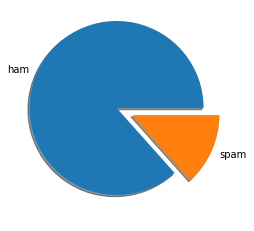

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline 
# seeing the distribution of classes, this will help us to identify which types 

len_ham = len(mail["Category"][mail.Category == "ham"])
len_spam = len(mail["Category"][mail.Category == "spam"])

arr = np.array([len_ham , len_spam]) 
labels = ['ham', 'spam'] 
print("Total No. Of Ham Cases :- ", len_ham)
print("Total No. Of Spam Cases :- ", len_spam)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

## Label encoding

In [76]:
# label spam mail as 0 && ham mail as 1
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

###  spam --- 0
### ham --- 1

In [77]:
#separate the data as text and labels;x--------> text;y-------> labels
x=mail_data['Message']
y=mail_data['Category']
print(x)
print('---------------------')
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
---------------------
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


## Splitting the data into training data & test data

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=3)

In [79]:
print(x.shape)
print(x_train)
print(x_test)

(5572,)
3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object
2632    URGENT! Your mobile No 077xxx WON a £2,000 Bon...
454     Ok i will tell her to stay out. Yeah its been ...
983     Congrats! 2 mobile 3G Videophones R yours. cal...
1282        Am I the only one who doesn't stalk profiles?
4610                               Y de asking like this.
                     

In [80]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


## Feature extraction

In [81]:
# transform text data to feature vectors  
#convert text to lower case letters
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

#covert y_train and y_test as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [82]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


print(x_train_features)

## Training the model

###  SVM

In [83]:
from sklearn.svm import LinearSVC

In [84]:
#using svm model to train the training data
model=LinearSVC()
model.fit(x_train_features,y_train)

LinearSVC()

### Evaluation of the model

In [85]:
#prediction on training data
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

print('accuracy on training data :',accuracy_on_training_data)


accuracy on training data : 0.9993269015032533


In [86]:
#prediction on test data
prediction_on_test_data =  model.predict(x_test_features)
accuracy_on_test_data=accuracy_score(y_test,prediction_on_test_data)
print(accuracy_on_test_data)

0.9820627802690582


In [87]:
input_mail=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
input_mail_features=feature_extraction.transform(input_mail)

prediction=model.predict(input_mail_features)
print(prediction)
if prediction[0]==1:
  print('Ham mail')
else:
  print('spam mail')

[1]
Ham mail


In [88]:
input_mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_mail_features=feature_extraction.transform(input_mail)

prediction=model.predict(input_mail_features)
print(prediction)
if prediction[0]==1:
  print('Ham mail')
else:
  print('spam mail')

[0]
spam mail
